In [1]:
import pandas as pd
datapath = '/home/ec2-user/SageMaker/mariano/datasets/multiculturalism/files/new_scores.csv'

df = pd.read_csv(datapath)
df['text'] = list(map(lambda id_: tdmstudio.get_title_and_text(tdmstudio.get_filename(str(id_))), df['id']))
df.head()

NameError: name 'tdmstudio' is not defined

In [4]:
import sys
sys.path.append('/home/ec2-user/SageMaker/mariano/repositories/tdmstudio-high-recall-information-retrieval-system/')
from utils import tdmstudio
from utils import nlp_auxiliary
vectorizer = nlp_auxiliary.get_default_vectorizer()

X = vectorizer.fit_transform(df['text'])

In [17]:
from utils import io
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(metric='cosine', eps=0.5, min_samples=2, )
clustering = dbscan.fit(X)
clustering.labels_
io.info(f'NUmber of clusters found: {len(set(clustering.labels_))}')
df['dbscan label']=clustering.labels_

array([-1,  0, -1, ..., -1, -1, -1])

In [69]:
import numpy as np
from numpy.linalg import norm
def cosine_similiarity_between(A:np.ndarray, B: np.ndarray)->float:
    """Similarity between two numpy arrays (1.0: equal)"""
    return np.dot(A,B)/(norm(A)*norm(B))



(array([6.2831870e+06, 1.4718856e+07, 7.2834090e+06, 2.6833870e+06,
        1.0260240e+06, 4.2600100e+05, 1.9190400e+05, 9.2558000e+04,
        4.6924000e+04, 2.4543000e+04, 1.3457000e+04, 7.5190000e+03,
        4.4140000e+03, 2.6060000e+03, 1.5360000e+03, 1.0040000e+03,
        5.8000000e+02, 4.1300000e+02, 2.5000000e+02, 1.4600000e+02,
        1.1000000e+02, 8.3000000e+01, 5.0000000e+01, 2.6000000e+01,
        1.4000000e+01, 6.0000000e+00, 5.0000000e+00, 7.0000000e+00,
        1.5000000e+01, 1.6000000e+01]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

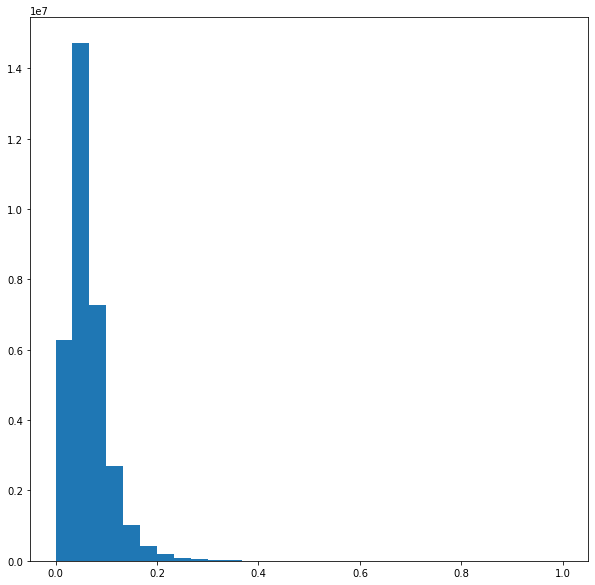

In [36]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, figsize=(10,10))
distances=[]
for ix1 in range(X.shape[0]):
    for ix2 in range(ix1, X.shape[0]):
        if ix1!= ix2:
            distances.append(cosine_similiarity(X[ix1,:].toarray()[0,:], X[ix2,:].toarray()[0,:]))
ax.hist(distances, bins=30)

(array([ 107786.,  423752., 1098605., 1957004., 2696021., 3135464.,
        3243848., 3101691., 2803944., 2433887., 2059693., 1713408.,
        1411978., 1154300.,  944048.,  769318.,  629266.,  514125.,
         422925.,  347769.,  287602.,  237493.,  198388.,  164815.,
         137728.,  116066.,   97439.,   82238.,   70397.,   59866.]),
 array([0.        , 0.00666666, 0.01333332, 0.01999997, 0.02666663,
        0.03333329, 0.03999995, 0.0466666 , 0.05333326, 0.05999992,
        0.06666658, 0.07333323, 0.07999989, 0.08666655, 0.09333321,
        0.09999987, 0.10666652, 0.11333318, 0.11999984, 0.1266665 ,
        0.13333315, 0.13999981, 0.14666647, 0.15333313, 0.15999978,
        0.16666644, 0.1733331 , 0.17999976, 0.18666641, 0.19333307,
        0.19999973]),
 <BarContainer object of 30 artists>)

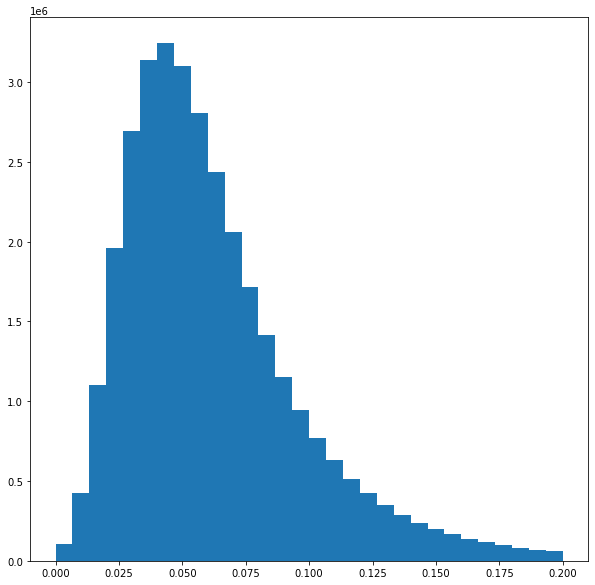

In [37]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, figsize=(10,10))

ax.hist([d for d in distances if d<0.2], bins=30)

In [41]:
from sklearn.cluster import DBSCAN
for eps in [0.025, 0.050 , 0.1, 0.5]:
    dbscan=DBSCAN(metric='cosine', eps=eps, min_samples=2, )
    clustering = dbscan.fit(X)
#     clustering.labels_
    io.info(f'eps={eps:5.4f} - NUmber of clusters found: {len(set(clustering.labels_))}')
    for cluster in set(clustering.labels_):
        io.info(f'cluster {cluster:3} number of instances: {np.sum(clustering.labels_==cluster)}')
#     df['dbscan label']=clustering.labels_

2022-12-21 21:36:51.561936 [ INFO  ] eps=0.0250 - NUmber of clusters found: 12
2022-12-21 21:36:51.562820 [ INFO  ] cluster   0 number of instances: 3
2022-12-21 21:36:51.562921 [ INFO  ] cluster   1 number of instances: 2
2022-12-21 21:36:51.563008 [ INFO  ] cluster   2 number of instances: 2
2022-12-21 21:36:51.563094 [ INFO  ] cluster   3 number of instances: 2
2022-12-21 21:36:51.563177 [ INFO  ] cluster   4 number of instances: 2
2022-12-21 21:36:51.563260 [ INFO  ] cluster   5 number of instances: 2
2022-12-21 21:36:51.563341 [ INFO  ] cluster   6 number of instances: 2
2022-12-21 21:36:51.563426 [ INFO  ] cluster   7 number of instances: 2
2022-12-21 21:36:51.563509 [ INFO  ] cluster   8 number of instances: 2
2022-12-21 21:36:51.563591 [ INFO  ] cluster   9 number of instances: 2
2022-12-21 21:36:51.563673 [ INFO  ] cluster  10 number of instances: 2
2022-12-21 21:36:51.563756 [ INFO  ] cluster  -1 number of instances: 8078
2022-12-21 21:37:00.516117 [ INFO  ] eps=0.0500 - NUmb

# ELBOW

In [42]:
np.average(distances)

0.06382504931233553

In [59]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(metric='cosine', eps=0.55, min_samples=2, )
clustering = dbscan.fit(X)
io.info(f'eps={eps:5.4f} - NUmber of clusters found: {len(set(clustering.labels_))}')
np.array([np.sum(clustering.labels_==cluster) for cluster in set(clustering.labels_)])
# for cluster in set(clustering.labels_):
#     io.info(f'cluster {cluster:3} number of instances: {}')

2022-12-21 21:59:09.726437 [ INFO  ] eps=0.5000 - NUmber of clusters found: 378


array([   2,  169,  228,    2,    2,   16,  289,   19,    5,    6,    3,
          7,    3,    4,    2,    3,    2,    5,    7,   12,    2,    5,
          4,   19,    4,   17,    3,   10,   10,   12,    4,    2,   18,
          3,    9,    2,    2,    3,   39,    3,    2,   11,    3,    2,
          3,   15,    2,    3,    2,    7,    6,    2,    3,    4,   11,
          3,    2,    9,   26,    2,    3,    2,    3,    2,    2,   18,
          5,    7,    5,   16,    6,    4,    2,    4,    5,    8,    2,
          2,    5,    2,    2,    6,    2,   27,    2,    4,    9,    5,
          3,    4,   27,    3,    3,    2,    2,   17,    2,    3,    2,
          2,    2,    2,    2,    2,   16,   12,    2,   10,    4,    4,
          3,    4,    2,    2,    3,    4,   17,    6,   10,   90,    4,
          2,    3,    2,    2,    3,    3,    2,    2,    2,    2,   28,
          2,    5,    2,    9,    3,    7,    3,    2,    5,    4,    2,
          6,    2,   10,    6,    2,    3,    2,   

In [58]:
df[clustering.labels_==4]

,URL,relevant_or_suggested,confidence,id,new_score,title,text
21,https://proquest.com/docview/1237388871,rel,1.0,1237388871,1.0,A political smorgasbord.,A political smorgasbord.\n \n ...
92,https://proquest.com/docview/1143909344,rel,1.0,1143909344,1.0,Tories' dreams of ethnic empire turn to nightm...,Tories' dreams of ethnic empire turn to nightm...


In [73]:
vec = np.array([[1,1,1,4],
               [2,2,2,4],
               [1,1,2,4],
              ])
vec

array([[1, 1, 1, 4],
       [2, 2, 2, 4],
       [1, 1, 2, 4]])

In [74]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(vec)

array([[1.        , 0.95382097, 0.97823198],
       [0.95382097, 1.        , 0.96698756],
       [0.97823198, 0.96698756, 1.        ]])

In [76]:
cosine_similiarity_between(vec[0,:],vec[1,:])

0.9538209664765318

# 1-nearest neighboor


In [87]:
from sklearn.metrics.pairwise import cosine_distances
distance_matrix=cosine_distances(X)
io.info(f'Similarity matrix shape={distance_matrix.shape}')


2022-12-22 11:53:37.992660 [ INFO  ] Similarity matrix shape=(8101, 8101)


In [110]:
arg_matrix.shape

(8101, 4)

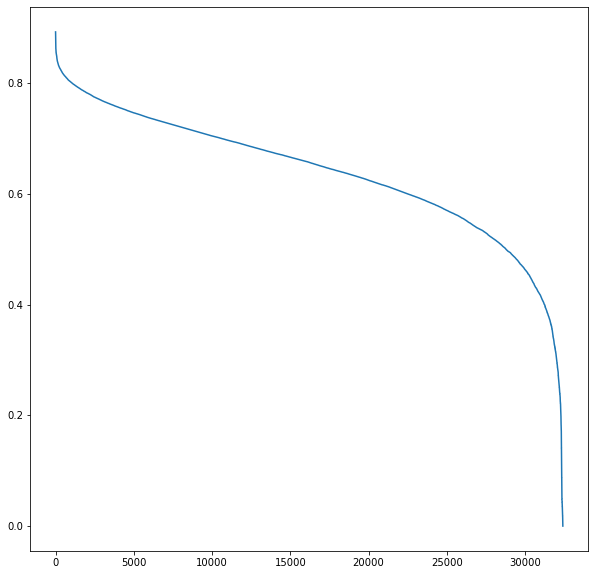

In [108]:
one_neighbor = []
no_of_neighbor=4
arg_matrix = np.argsort(distance_matrix,axis=1)[:,1:no_of_neighbor+1]
for i in range(arg_matrix.shape[1]):
    args = arg_matrix[:,i]
    for ix,arg in zip(range(distance_matrix.shape[0]),args):
        one_neighbor.append(distance_matrix[ix,arg])
    
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1, figsize=(10,10))
ax.plot(range(len(one_neighbor)),sorted(one_neighbor, reverse=True))